<a href="https://colab.research.google.com/github/wallykop/iad-deep-learning/blob/master/Seminar7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Эмбеддинги (векторные представления) слов

### **1. Что такое word embedding?**

При работе с текстами нам хотелось бы понимать, как соотносятся между собой слова в языке (например, насколько они похожи или различны — в каком-то релевантном для решаемой задачи смысле). Поэтому мы можем работать не с самими словами в формате строк, а с их числовым — или скорее векторным — представлением.

Один из очевидных способов представить слово в виде строки — one-hot encoding. Однако такое представление, с одной стороны, требует огромного ресурса памяти (например, в русском языке более 100000 слов), а, с другой стороны, не даёт содержательной информации о том, как эти слова между собой соотносятся.

### **2. Word2Vec**

Краткое напоминание о том, что такое косинусное расстояние между векторами $x$ и $y$, которое можно рассматривать как меру сходства между ними:

$similarity(x, y) = \cos(\Theta) = \frac{\langle x, y \rangle}{||x|| \cdot ||y||}$, где $\Theta$ — угол между векторами.

Модель Word2Vec строит такие векторные представления, чтобы векторы похожих слов оказывались близки по косинусному расстоянию. Похожими считаются слова, которые часто встречаются в одном и том же контексте.

Есть различные подходы к тому, как обучать векторные представления. Первый из них — CBoW (Continuous Bag of Words), предсказание слова по контексту, и второй — SkipGram, предсказание контекста по слову. Подробнее об архитектуре и модификациях функции потерь можно прочитать [здесь](https://https://arxiv.org/pdf/1301.3781.pdf) и [здесь](https://https://arxiv.org/abs/1310.4546).

Рассмотрим word2vec, [реализованный](https://https://radimrehurek.com/gensim/models/word2vec.html) в библиотеке gensim.

In [0]:
!pip install -U gensim

     |████████████████████████████████| 24.2MB 99kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Посмотрим, какие доступны предобученные модели.

In [0]:
from gensim.models import Word2Vec
import gensim.downloader as api

api.info()

{'corpora': {'20-newsgroups': {'checksum': 'c92fd4f6640a86d5ba89eaad818a9891',
   'description': 'The notorious collection of approximately 20,000 newsgroup posts, partitioned (nearly) evenly across 20 different newsgroups.',
   'fields': {'data': '',
    'id': 'original id inferred from folder name',
    'set': "marker of original split (possible values 'train' and 'test')",
    'topic': 'name of topic (20 variant of possible values)'},
   'file_name': '20-newsgroups.gz',
   'file_size': 14483581,
   'license': 'not found',
   'num_records': 18846,
   'parts': 1,
   'read_more': ['http://qwone.com/~jason/20Newsgroups/'],
   'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/20-newsgroups/__init__.py',
   'record_format': 'dict'},
  '__testing_matrix-synopsis': {'checksum': '1767ac93a089b43899d54944b07d9dc5',
   'description': '[THIS IS ONLY FOR TESTING] Synopsis of the movie matrix.',
   'file_name': '__testing_matrix-synopsis.gz',
   'parts': 1,
   're

Среди них есть word2vec-ruscorpora-300 — word2vec, обученный на Национальном корпусе русского языка. Можно выгрузить эту модель и, например, посмотреть на слова, самые близкие к заданным:

In [0]:
model = api.load("word2vec-ruscorpora-300")

[==================================================] 100.0% 198.8/198.8MB downloaded


In [0]:
model.most_similar('человек_NOUN', topn=5) #topn — сколько ближайших слов мы хотим получить

[('женщина_NOUN', 0.5500056743621826),
 ('мужчина_NOUN', 0.5161216855049133),
 ('человеческий_ADJ', 0.5005477666854858),
 ('идолопоклонствовать_VERB', 0.48388850688934326),
 ('высокопорядочный_ADJ', 0.4818764925003052)]

In [0]:
model.most_similar('счастливый_ADJ', topn=15)

[('несчастливый_ADJ', 0.677182674407959),
 ('счастие_NOUN', 0.6733449697494507),
 ('счастливо_ADV', 0.6329190731048584),
 ('радостный_ADJ', 0.6159152388572693),
 ('беззаботный_ADJ', 0.5699828267097473),
 ('пресчастливый_ADJ', 0.551605224609375),
 ('радоваться_VERB', 0.5468602180480957),
 ('довольный_ADJ', 0.5460575819015503),
 ('несчастный_ADJ', 0.5273663401603699),
 ('благополучный_ADJ', 0.526889443397522),
 ('веселый_ADJ', 0.5250555276870728),
 ('счастливец_NOUN', 0.5245419144630432),
 ('безмятежный_ADJ', 0.5210704803466797),
 ('беспечный_ADJ', 0.519269585609436),
 ('многолюбить_VERB', 0.5067941546440125)]

In [0]:
model.most_similar('страдание_NOUN', topn=15)

[('мучение_NOUN', 0.7332583069801331),
 ('скорбь_NOUN', 0.690568208694458),
 ('weh_NOUN', 0.6190615296363831),
 ('боль_NOUN', 0.6111535429954529),
 ('горесть_NOUN', 0.6037793159484863),
 ('унижение_NOUN', 0.5936344861984253),
 ('горе_NOUN', 0.5935355424880981),
 ('печаль_NOUN', 0.5926101207733154),
 ('терзание_NOUN', 0.5902732014656067),
 ('мучительный_ADJ', 0.5867823362350464),
 ('сострадание_NOUN', 0.5863081216812134),
 ('самопрезрение_NOUN', 0.5773346424102783),
 ('страдальческий_ADJ', 0.5745018124580383),
 ('сокрушенность_NOUN', 0.5718698501586914),
 ('обезбоженность_NOUN', 0.5711917281150818)]

In [0]:
model['слово_NOUN']

array([-0.03098533, -0.00053959,  0.02363064,  0.04088516, -0.12235478,
        0.01402667, -0.14872657,  0.00290933, -0.01050847,  0.05748657,
        0.02532393, -0.08375523, -0.0307561 ,  0.03553408,  0.04336263,
       -0.06363305,  0.12223493,  0.05455168, -0.04663691,  0.00036571,
        0.03639492,  0.03098198, -0.04403979,  0.00360683, -0.0146153 ,
       -0.00697394,  0.08819118, -0.00466466, -0.03221243, -0.1456609 ,
        0.02774271,  0.05498128,  0.08642582, -0.11406243,  0.01681696,
       -0.00069016,  0.02352861, -0.01357114, -0.03541047,  0.01251028,
        0.14368953,  0.04052319, -0.00270025, -0.03703755,  0.08754944,
       -0.01130779, -0.00525366, -0.05427918,  0.02412541, -0.01482118,
        0.00273986, -0.02723974,  0.03942235, -0.00209945,  0.06699691,
       -0.09009016,  0.02754051,  0.01480221,  0.03153231, -0.0810911 ,
       -0.01214095,  0.07539935,  0.05924717,  0.00758106, -0.04232567,
       -0.08104685,  0.05428125, -0.046064  , -0.03473083,  0.08

Обратите внимание, что все слова помечены частями речи.

Попробуйте найти косинусное расстояние между векторными представлениями слов "кошка" и "собака", "дом" и "дерево", "радостный" и "грустный" (подсказка: вам НЕ нужно руками писать формулу косинусного расстояния).

In [0]:
# student.write_code()
model.similarity('кошка_NOUN', 'собака_NOUN')

0.69631803

In [0]:
model.distance('кошка_NOUN', 'собака_NOUN')

0.30368196964263916

In [0]:
model.similarity('радостный_ADJ', 'грустный_ADJ')

0.5377942

In [0]:
model.similarity('дом_NOUN', 'дерево_NOUN')

0.25315186

Заметим, что слова, обозначающие объекты разной природы, отличаются гораздо сильнее, чем антонимичные по смыслу слова. Как вы думаете, почему?

Проверьте, работают ли с векторными представлениями слов арифметические операции: "король" - "мужчина" + "женщина" = ?

In [0]:
sorted(model.similar_by_vector(model["король_NOUN"] - model["мужчина_NOUN"] + model["женщина_NOUN"]), key=lambda x: x[1])[::-1]

[('король_NOUN', 0.880538821220398),
 ('королева_NOUN', 0.7313904166221619),
 ('герцог_NOUN', 0.6502388715744019),
 ('принцесса_NOUN', 0.6266285181045532),
 ('герцогиня_NOUN', 0.6240381002426147),
 ('королевство_NOUN', 0.6094207167625427),
 ('зюдерманландский_ADJ', 0.6084389686584473),
 ('дурлахский_ADJ', 0.6081665754318237),
 ('ульрик::элеонора_NOUN', 0.6073107719421387),
 ('максимилианов_NOUN', 0.6057003736495972)]

In [0]:
model.similar_by_vector(model["россия_NOUN"] - model["москва_NOUN"] + model["вашингтон_NOUN"])

[('вашингтон_NOUN', 0.6899176239967346),
 ('сша_NOUN', 0.6506260633468628),
 ('соединенный::штат_NOUN', 0.6384286880493164),
 ('барак::обама_NOUN', 0.5869373083114624),
 ('россия_NOUN', 0.5749807357788086),
 ('ремилитаризация_NOUN', 0.553461492061615),
 ('маккейн_NOUN', 0.549994945526123),
 ('первез::мушарраф_NOUN', 0.5385586023330688),
 ('кондолиза::райс_NOUN', 0.5368469953536987),
 ('мушарраф_NOUN', 0.5355950593948364)]

In [0]:
model.similar_by_vector(model["доктор_NOUN"] - model["мужчина_NOUN"] + model["женщина_NOUN"])

[('доктор_NOUN', 0.8990038633346558),
 ('гаспар::арнерить_VERB', 0.5921429395675659),
 ('лекарь_NOUN', 0.5689215660095215),
 ('врач_NOUN', 0.5619601011276245),
 ('штофреген_NOUN', 0.5506161451339722),
 ('варвинский_ADJ', 0.5456588268280029),
 ('профессор_NOUN', 0.545427680015564),
 ('несмеянова_NOUN', 0.5367991924285889),
 ('фельдшер_NOUN', 0.5270867943763733),
 ('шнауберт_NOUN', 0.5242451429367065)]

In [0]:
model.similar_by_vector(model["россия_NOUN"] - model["путин_NOUN"] + model["ельцин_NOUN"])

[('россия_NOUN', 0.7918543815612793),
 ('страна_NOUN', 0.5983262658119202),
 ('европа_NOUN', 0.5812810659408569),
 ('польша_NOUN', 0.5526736974716187),
 ('издание::нти_NOUN', 0.544858992099762),
 ('франция_NOUN', 0.5326335430145264),
 ('финляндия_NOUN', 0.5167974829673767),
 ('швеция_NOUN', 0.5095986127853394),
 ('ссср_NOUN', 0.5063239336013794),
 ('ельцин_NOUN', 0.5009214282035828)]

Однако результат зависит от использованного текстового корпуса, и такую предобученную модель вряд ли можно будет использовать, например, для анализа записей из Twitter. Поэтому может возникнуть необходимость обучить модель самостоятельно.

В качестве примера рассмотрим "игрушечный" датасет, который есть в gensim.

In [0]:
from gensim.test.utils import common_texts

for text in common_texts:
  print(text)

model_w2v_toy = Word2Vec(common_texts, size=20, min_count=1)
model_w2v_toy.wv.most_similar(positive='human', topn=15)

['human', 'interface', 'computer']
['survey', 'user', 'computer', 'system', 'response', 'time']
['eps', 'user', 'interface', 'system']
['system', 'human', 'system', 'eps']
['user', 'response', 'time']
['trees']
['graph', 'trees']
['graph', 'minors', 'trees']
['graph', 'minors', 'survey']


[('interface', 0.21763473749160767),
 ('graph', 0.2004372626543045),
 ('time', 0.10484740138053894),
 ('computer', 0.08117406070232391),
 ('response', 0.08015908300876617),
 ('eps', 0.04889708384871483),
 ('system', 0.045375123620033264),
 ('survey', -0.03986334800720215),
 ('user', -0.12951920926570892),
 ('minors', -0.18962958455085754),
 ('trees', -0.22754357755184174)]

In [0]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

Однако для настоящего обучения модели нужен текст очень большого размера. Возьмём, например, Библию (потому что почему бы и нет). Обратите внимание, что перед обучением текст нужно предобработать (выбросить пунктуацию и стоп-слова).

In [0]:
!pip install pymorphy2

     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 7.1MB 23.8MB/s 


In [0]:
!pip install nltk

In [0]:
import urllib.request
import re
import pymorphy2
import nltk
from nltk.corpus import stopwords
#эта ячейка будет работать ДОЛГО
nltk.download('stopwords')
morph = pymorphy2.MorphAnalyzer()
regex = re.compile('[^а-яА-Я ё\-]')
stop = stopwords.words('russian')
# + ['сказать', 'и', 'твой']

data = urllib.request.urlopen('https://raw.githubusercontent.com/somethingneverending/nlp-files/master/Bible.txt')
X = []
for line in data:
  cur = regex.sub('',line.decode('utf-8')).split('\n')[0].split(' ')
  for word in cur:
    normal_word = morph.parse(word.lower())[0].normal_form
    if word != '' and normal_word not in stop:
      X.append(normal_word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
X[:20]

['ветхий',
 'завет',
 'ветхий',
 'завет',
 'пятикнижие',
 'моисей',
 'бытие',
 'глава',
 'начало',
 'сотворить',
 'бог',
 'небо',
 'земля',
 'земля',
 'безвидный',
 'пустой',
 'тьма',
 'бездна',
 'дух',
 'божий']

In [0]:
model_w2v = Word2Vec([X], size=300, window=5, min_count=1)

Посмотрите на синонимы тех же слов, которые мы рассматривали для предобученной модели.

In [0]:
#YOUR CODE HERE
model_w2v.most_similar('человек', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('иаков', 0.9838796257972717),
 ('дочь', 0.9833798408508301),
 ('сын', 0.9833533763885498),
 ('сказать', 0.9831636548042297),
 ('земля', 0.9824841022491455)]

...Кажется, что-то изменилось.

Визуализируем 55 наиболее встречающихся слов:

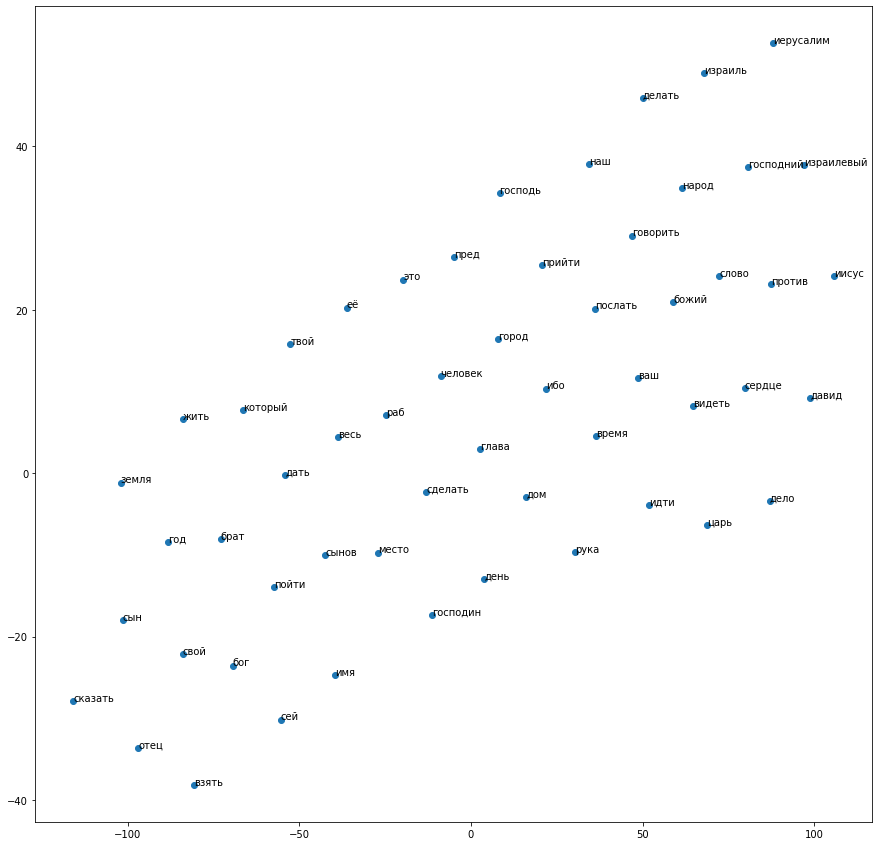

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

vocab = [(model_w2v.wv.vocab[x].count, x) for x in model_w2v.wv.vocab]
vocab.sort(reverse=True)
vocab = vocab[:55]

def visualize(vocab):
  all_vocab = []
  for i in range(len(vocab)):
    all_vocab = all_vocab + vocab[i]
  emb_tuple = tuple([model_w2v.wv[word] for word in all_vocab])
  X_vis = np.vstack(emb_tuple)

  model_tsne = TSNE(n_components=2, random_state=0)
  np.set_printoptions(suppress=True)

  X_tsne = model_tsne.fit_transform(X_vis)
  cur = 0
  plt.figure(figsize = [15, 15])
  for part in vocab:
    word_labels = [word for word in part]
    plt.scatter(X_tsne[cur:cur + len(part), 0], X_tsne[cur:cur + len(part), 1])
    for i, word in enumerate(word_labels):
        plt.annotate(word, (X_tsne[cur + i, 0], X_tsne[cur + i, 1]))
    cur += len(part)
  plt.show()

vocab = [tmp37[1] for tmp37 in vocab]
visualize([vocab])

Сделайте то же самое, например, для тридцати слов, ближайшим к какому-нибудь слову; для двадцати ближайших и двадцати самых дальних.

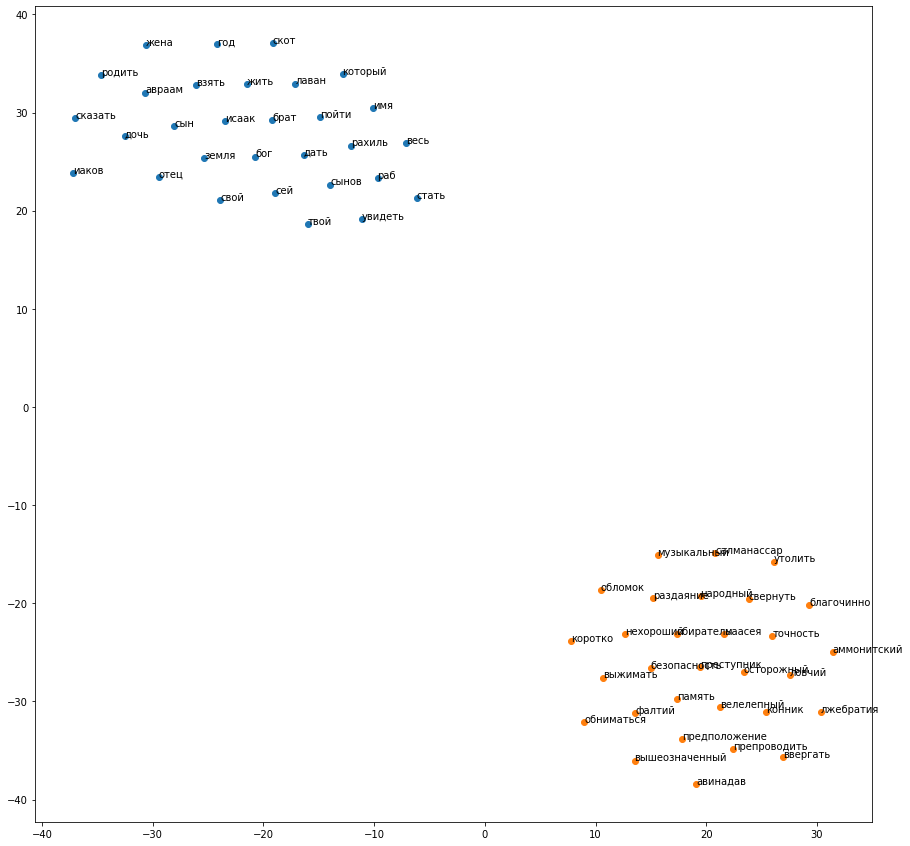

In [0]:
vocab = [word[0] for word in model_w2v.wv.most_similar('человек', topn=30)]
vocab2 = [word[0] for word in model_w2v.wv.most_similar(negative=['человек'], topn=30,)]
visualize([vocab, vocab2])

То же самое можете сделать самостоятельно и с предобученной моделью.